# The Heat equation - part 2

## Numerical solutions
A solution can be found numerically using time steps with the so-called "leap frog" method. To do this we replace the derivative in time with the approximation
$$\frac{\partial T(x,t)}{\partial t} = \frac{T(x,t+\Delta t)-T(x,t)}{\Delta t} + ...$$
To approximate the second derivative over $x$ we write
$$T(x+\Delta x,t ) = T(x,t) + \frac{\partial T(x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 T(x,t)}{\partial x^2} (\Delta x)^2+...$$
$$T(x-\Delta x,t ) = T(x,t) - \frac{\partial T(x,t)}{\partial x} \Delta x + \frac{1}{2} \frac{\partial^2 T(x,t)}{\partial x^2} (\Delta x)^2+...$$
Adding the two terms and solving for the second derivative we obtain
$$\frac{\partial^2 T(x,t)}{\partial x^2} = \frac{1}{\Delta x^2} \left[T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right]$$
Substituting both approximations in the heat equations
$$\frac{T(x,t+\Delta t)-T(x,t)}{\Delta t} = \frac{k}{c \rho} \frac{1}{\Delta x^2} \left[T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right]$$
By which we get
$$T(x,t+\Delta t)=T(x,t) + \eta \left[ T(x+\Delta x)+T(x-\Delta x)-2T(x,t) \right] \ \ \ , \ \eta=\frac{k \Delta t}{c \rho \Delta x^2} $$
Thus we can evaluate the value of $T(x,t+\Delta t)$ once the value of $T(x,t)$ is known. The numerical method will consist in starting with the given initial condition at $t=0$ and propagate that forward in time, hence the name of "leap frog".

Create a matrix of points $T_{i,j}$ with intervals $\Delta t$ and $\Delta x$ and solve the equation using the leapfrog method:
$$T_{i,j+1}=T_{i,j} + \eta \left[T_{i+1,j}+T_{i-1,j}-2T_{i,j} \right], \ \ \ \eta=\frac{k\Delta t}{C \rho \Delta x^2}$$
Where we have indicated $x=i \Delta x$ and $t=j \Delta t$. Start by using $\Delta x=0.01$m and $\Delta t=0.5$s 

## Code the numerical solution
Write code to calculate $T_{ij}$ in a recursive manner. 
- Plot T(x,t) for t=0, 20, 100s and compare with the plot in Exercise 1
- Repeat the 3-D $T(x,t)$ wireframe plot of Exercise 1. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

"""
We're going to make a matrix of 0s & 1s, then change the first line to 100s, then multiply by the results of each run of the method (or maybe just replace them, we'll see)

This will all be cleaned up and turned into functions in the next block, this is just my workings
"""
# Define constants
C=900  # J/(kg K)
Rh=2700 # kg/m3
k=220  # W/(m K)

# Define parameters of the problem
L=0.3 # m
T0=100.  # C

dX = 0.01
dt = 0.5
tMax = 100

Xwidth = round(L/dX)
twidth = round(tMax/dt)
Eta = (k * dt) / (C * Rh * (dX**2))

#Just sanity checks
# print(Xwidth)
# print(twidth)
# print(Eta)

"""
# Number of points along x and t. Note! We need to do 31 and 201 points to get the correct Delta X and Delta T. 
def LeapFrog(NPx,NPt,tmax): #I have no idea what this is or why it is here
"""

#Make some lists:
Tinit = np.ones((twidth + 1, Xwidth + 1))
Tinit[0] = Tinit[0] * T0 #First line should be 100s & 0s

for y in range (0, twidth + 1): #For all lines, first and last digit are 0
    Tinit[y, 0] = 0
    Tinit[y, Xwidth] = 0

TMat = Tinit
# print(Tinit)
# print(TMat)

for j in range (0, twidth):
    for i in range (1, Xwidth):
        TMat[j + 1,i] = TMat[j,i] + Eta * (TMat[j,i + 1] + TMat[j,i - 1] - 2 * TMat[j,i])

print(TMat)


[[  0. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
  100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
  100. 100.   0.]]


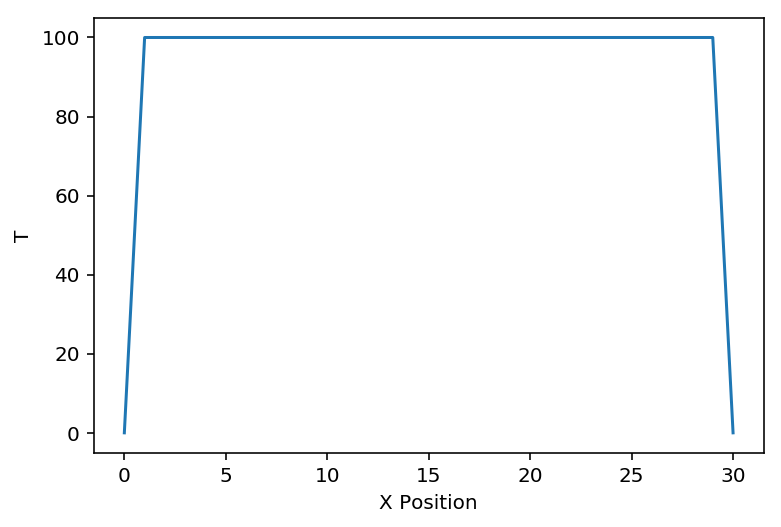

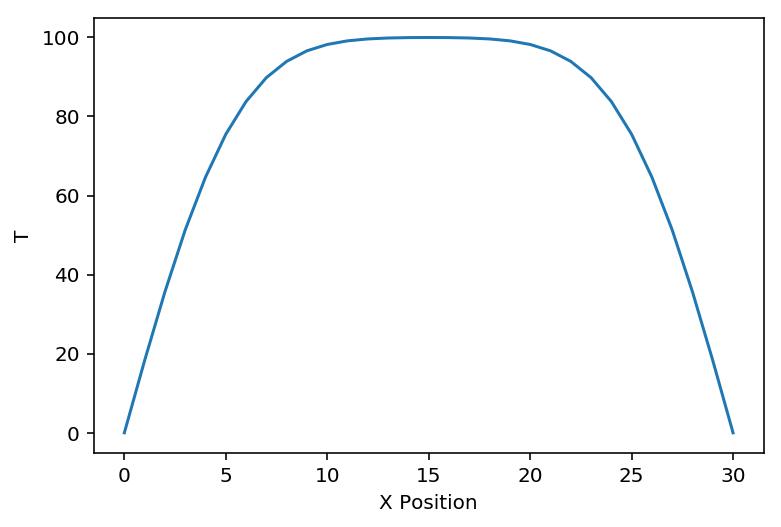

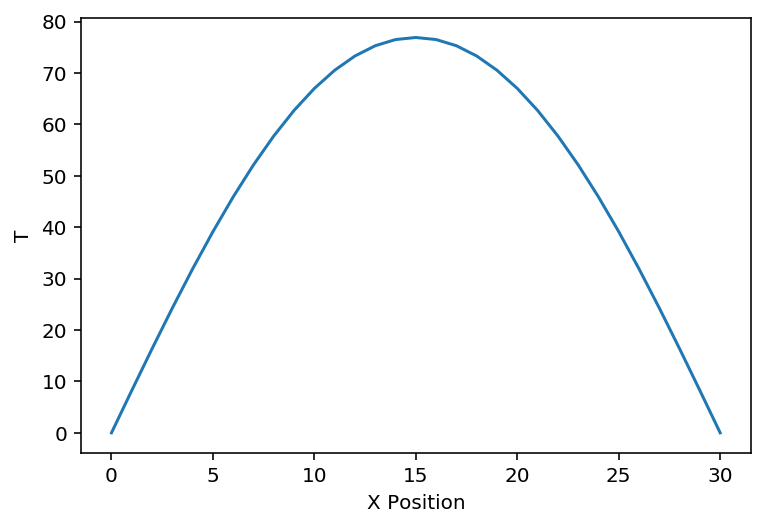

IndexError: arrays used as indices must be of integer (or boolean) type

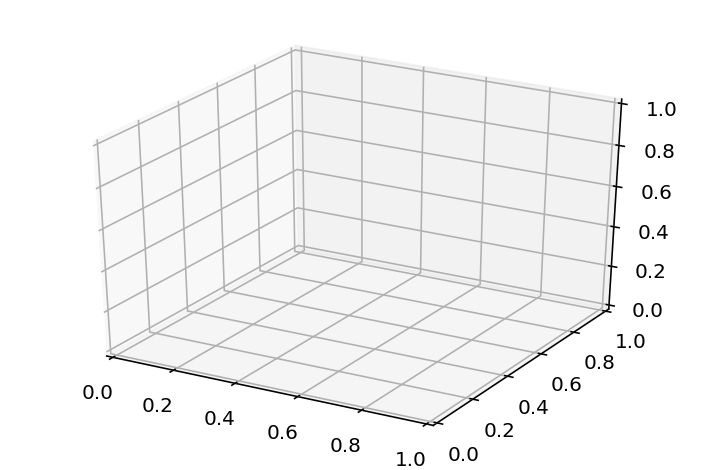

In [26]:
import numpy as np #Yes I know I don't need this in every block, but I don't want to re-run everything every time Cocalc crashes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
C=900  # J/(kg K)
Rh=2700 # kg/m3
k=220  # W/(m K

#Turning the last block into a function. Most of the comments and w/e will be the exact same as above, so they're up there if needed.
#Note: Use a local editor in future

def LeapfrogLast(dX, dt, tMax, T0, L):
    """Will print the final line of a matrix for T, produced by the leapfog method. Arguments: dX, dt, tMax, T0, L"""
    Xwidth = round(L/dX)
    twidth = round(tMax/dt)
    Eta = (k * dt) / (C * Rh * (dX**2))
    TMat = np.ones((twidth + 1, Xwidth + 1))
    TMat[0] = TMat[0] * T0
    
    for y in range (0, twidth + 1): #For all lines, first and last digit are 0
        TMat[y, 0] = 0
        TMat[y, Xwidth] = 0
    
    TMat = TMat
    
    for j in range (0, twidth):
        for i in range (1, Xwidth):
            TMat[j + 1,i] = TMat[j,i] + Eta * (TMat[j,i + 1] + TMat[j,i - 1] - 2 * TMat[j,i])

    return(TMat[tMax]) #This will make it return the final line. This should make it easier to plot (or maybe it won't, I don't know)


def LeapfrogFull(dX, dt, tMax, T0, L):
    """Will print the full matrix for T, produced by the leapfog method. Arguments: dX, dt, tMax, T0, L"""
    Xwidth = round(L/dX)
    twidth = round(tMax/dt)
    Eta = (k * dt) / (C * Rh * (dX**2))
    TMat = np.ones((twidth + 1, Xwidth + 1))
    TMat[0] = TMat[0] * T0

    for y in range (0, twidth + 1): #For all lines, first and last digit are 0
        TMat[y, 0] = 0
        TMat[y, Xwidth] = 0

    for j in range (0, twidth):
        for i in range (1, Xwidth):
            TMat[j + 1,i] = TMat[j,i] + Eta * (TMat[j,i + 1] + TMat[j,i - 1] - 2 * TMat[j,i])
    return(TMat) #This will return the full matrix. This might make doing a 3D plot easier(Again, I dunno if this is true either)


def TFind(x, t, dX, dt, tMax, T0, L):
    """Finds the value of T, produced by the leapfrog method, for a given x & t. Arguments: x, t, dX, dt, tMax, T0, L. T0 is not used but allows for easy copy-paste of values"""
    TMat = LeapfrogFull(dX, dt, tMax, T0, L)
    TVal = TMat[t, x]
    return(TVal)

def ThrDPlot(dX, dt, tMax, T0, L): #I just want to see if this works when put straight into the wireframe plotting function. I didn't do the python course last year, so have no idea what any of this does
    """Will output the X,T required for a 3D plot for T vs x & t. Arguments: dX, dt, tMax, T0, L"""
    xs3d = np.linspace(0, L, round(L/dX))
    ts3d = np.linspace(0, tMax, round(tMax/dt))
    X, T = np.meshgrid(xs3d, ts3d)
    return(X, T)

"""
def ThrDPlotMesh(dX, dt, tMax, T0, L):
    xs3d, ts3d = ThrDPlotLin(dX, dt, tMax, T0, L)
    X, T = np.meshgrid(xs3d, ts3d)
    return(X, T)
"""

plt.plot(LeapfrogLast(0.01, 0.5, 0, 100, 0.3)) #For t = 0
plt.xlabel('X Position *10-2')
plt.ylabel('T')
plt.show()

plt.plot(LeapfrogLast(0.01, 0.5, 20, 100, 0.3)) #For t = 20
plt.xlabel('X Position *10-2')
plt.ylabel('T')
plt.show()

plt.plot(LeapfrogLast(0.01, 0.5, 100, 100, 0.3)) #For t = 100
plt.xlabel('X Position *10-2')
plt.ylabel('T')
plt.show()
"""
Whilst the plots for t=20, 100 appear to be the same as last week's method, the plot for t=0 is missing the large fluctuations at either end. The peak value for t=100 is also lower that last week's plot
"""
fig = plt.figure()
ax = fig.gca(projection = '3d')
X, T = ThrDPlot(0.01, 0.5, 100, 100, 0.3)
ax.plot_wireframe(X, T, TFind(X, T, 0.01, 0.5, 100, 100, 0.3) ) #This doesn't work, can't just input the X,T from the 'ThrDPlot' function. Need to find a way to find a way to turn the X & T into values that can be used to index (integers). Presumably we find out the index of the X & T values then put them into here, but I can't think how to do that.


In [25]:
#Tests/Debug

# X, T = ThrDPlot(0.01, 0.5, 100, 100, 0.3)
# print(X, T)

# TMat = LeapfrogFull(0.01, 0.5, 100, 100, 0.3)
# TVAL = TMat[1, 2]
# print(TMat)
# print('-----------------------------------------------------------------------')
# print(TVAL)

# print(LeapfrogLast(0.01, 0.5, 100, 100, 0.3))

# def EtaCalc(dX, dt)
#     return((k * dt) / (C * Rh * (dX**2)))



[[  0.         100.         100.         ... 100.         100.
    0.        ]
 [  0.          54.73251029 100.         ... 100.          54.73251029
    0.        ]
 [  0.          50.44793307  79.50854375 ...  79.50854375  50.44793307
    0.        ]
 ...
 [  0.           4.96995957   9.88532399 ...   9.88532399   4.96995957
    0.        ]
 [  0.           4.94524572   9.8361734  ...   9.8361734    4.94524572
    0.        ]
 [  0.           4.92065731   9.78727205 ...   9.78727205   4.92065731
    0.        ]]
-----------------------------------------------------------------------
100.0


#### Stability study
In this section we evaluate how the quality of our solution depends on the choice of $\Delta x$ and $\Delta t$. We will not be able to find a stable solution if the value of $\eta>0.5$. This can be checked using the cases below. For each of the 4 cases below calculate the value of $eta$ and plot $T(x,t=100s)$
- Fix $\Delta x = 0.01$ m and change the value of $\Delta t$ to 0.2 s and 1 s. Compare the results with those obtained in exercise 2. 
- Fix $\Delta t = 0.5$ s and change the value of $\Delta x$ to 0.02 m and 0.005 m. Compare the results with those obtained in exercise 2.

A mathematical proof of the instability for $\eta>0.5$ is provided in addendum. 


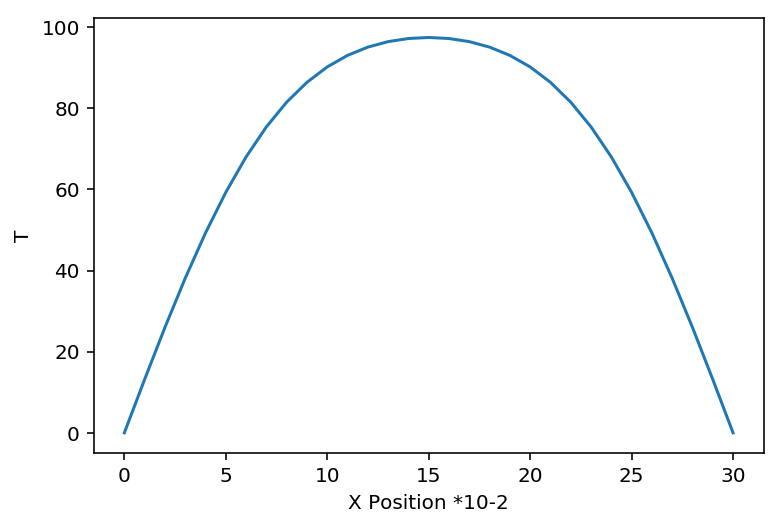

Eta =  0.18106995884773663


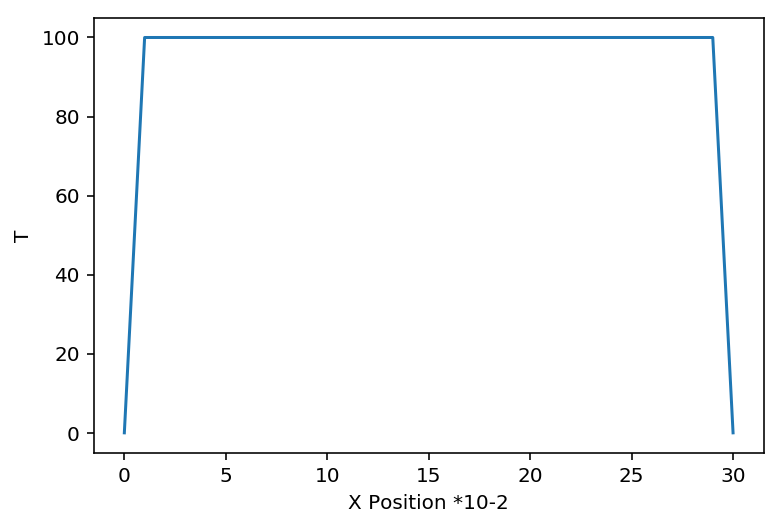

Eta =  0.9053497942386831


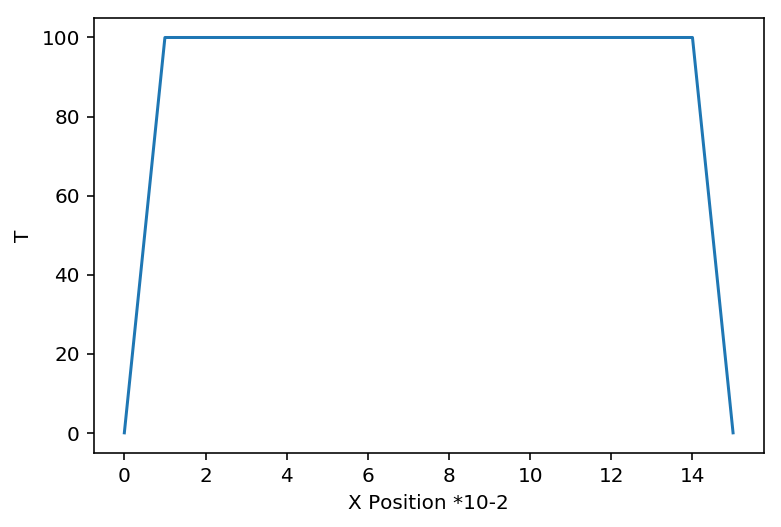

Eta =  0.0011316872427983538


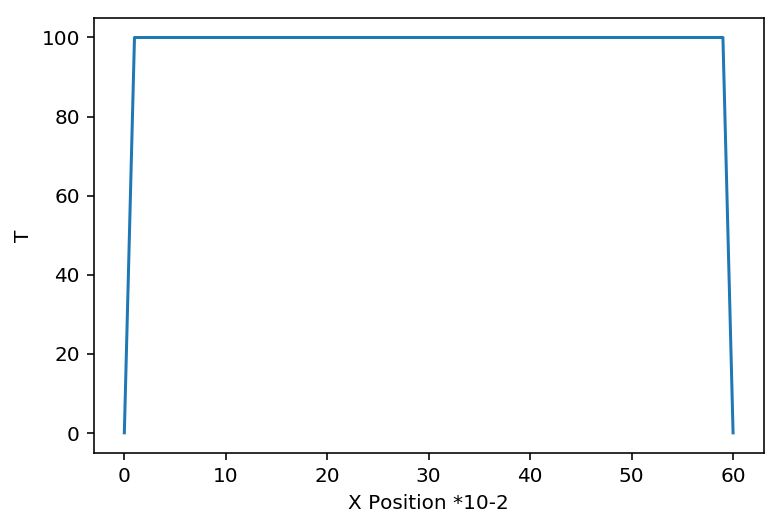

Eta =  1.8106995884773662


In [31]:
#Stability Study:

def EtaCalc(dX, dt):
    return((k * dt) / (C * Rh * (dX**2)))

plt.plot(LeapfrogLast(0.01, 0.2, 100, 100, 0.3)) #For t = 100, dx = 0.01, dt = 0.2 This is similar to the t=20 plot in Ex. 2
plt.xlabel('X Position *10-2')
plt.ylabel('T')
plt.show()
print('Eta = ', EtaCalc(0.01, 0.2))

#These next 3 all look similar to the t=0 plot
plt.plot(LeapfrogLast(0.01, 1, 0, 100, 0.3)) #For t = 100, dx = 0.01, dt = 1
plt.xlabel('X Position *10-2')
plt.ylabel('T')
plt.show()
print('Eta = ', EtaCalc(0.01, 1)) #Eta > 0.5, thus we cannot find a stable solution


plt.plot(LeapfrogLast(0.02, 0.5, 0, 100, 0.3)) #For t = 100, dx = 0.02, dt = 0.5
plt.xlabel('X Position *10-2')
plt.ylabel('T')
plt.show()
print('Eta = ', EtaCalc(0.2, 0.5))

plt.plot(LeapfrogLast(0.005, 0.5, 0, 100, 0.3)) #For t = 100, dx = 0.005, dt = 0.5
plt.xlabel('X Position *10-2')
plt.ylabel('T')
plt.show()
print('Eta = ', EtaCalc(0.005, 0.5)) #Eta > 0.5, thus we cannot find a stable solution


## Compute performance (PHY428)
- Using the leap-frog numerical solution, show the time needed to evaluate the first 100 s of the solution as a function of $\Delta x$ and $\Delta t$. Present two graphs, one where $\Delta x$ is fixed and one when $\Delta t$ is fixed. Mark on the graph where the $\eta=0.5$ condition is reached.


## Addendum. Calculation of the stability limit
You noticed that the difference between the analytical solution and the leap frog solution exhibits wild fluctuations when the leap frog solution does not converge. When that happens the solution is not stable. To assess the value of the parameter for which we obtain a stable solution, we assume that the difference has eigenmodes:
$$T_{m,j}=\xi(\lambda)^j \exp \left( {i \frac{2\pi}{\lambda} m \Delta x } \right)$$
Where we use $i$ as the imaginary constant and $T_{m,j}$ refers to the temperature at time $j \Delta t$ for the point $m \Delta x$. 

This formula tells us that any eigenmode in the difference gets amplified or damped at every iteration by a factor $\xi$, which depends on the wavelength $\lambda$ of the mode. Replacing the equation above into the formula used for the leap-frog method we obtain:
$$\xi(\lambda)^{j+1} \exp \left(i \frac{2\pi}{\lambda} m \Delta x \right) = \xi(\lambda)^{j} \exp \left(i \frac{2\pi}{\lambda} m \Delta x  \right)+ \eta \left[  \exp \left(i \frac{2\pi}{\lambda} (m+1) \Delta x  \right)  + \exp \left(i \frac{2\pi}{\lambda} (m-1) \Delta x  \right) -2 \exp \left(i \frac{2\pi}{\lambda} m \Delta x  \right)   \right]$$

Dividing both sides of the equation by $ \xi(\lambda)^{j} \exp \left(i \frac{2\pi}{\lambda} m \Delta x \right)$ we obtain:
$$\xi(\lambda) = 1 + 2 \eta \left[ \cos \left( \frac{2\pi}{\lambda} m \Delta x  \right) -1 \right] $$

For the quantity $|\xi|<1$ for any value of $x$, we need to have $\eta < 0.5$


### General reference
This project was inspired by Chapter 14 of the book "Computational Physics" by Laundau, Paez and Bordeianu published by Wiley. There should be a few copies available in the library. 